# Importing Libraries

In [88]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm 
import warnings
warnings.filterwarnings('ignore')

In [89]:
df = pd.read_csv('houses_to_rent.csv')
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
city                   10692 non-null object
area                   10692 non-null int64
rooms                  10692 non-null int64
bathroom               10692 non-null int64
parking spaces         10692 non-null int64
floor                  10692 non-null object
animal                 10692 non-null object
furniture              10692 non-null object
hoa (R$)               10692 non-null int64
rent amount (R$)       10692 non-null int64
property tax (R$)      10692 non-null int64
fire insurance (R$)    10692 non-null int64
total (R$)             10692 non-null int64
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


# Data cleaning and Pre-processing

In [91]:
columns = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
for cols in columns:
    print(f'Unique values for {cols} is \n{df[cols].unique()}\n')

Unique values for city is 
['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']

Unique values for floor is 
['7' '20' '6' '2' '1' '-' '4' '3' '10' '11' '24' '9' '8' '17' '18' '5'
 '13' '15' '16' '14' '26' '12' '21' '19' '22' '27' '23' '35' '25' '46'
 '28' '29' '301' '51' '32']

Unique values for animal is 
['acept' 'not acept']

Unique values for furniture is 
['furnished' 'not furnished']



In [92]:
replace_struc = {'acept': 0, 'not acept': 1}
df['animal'] = df['animal'].map(replace_struc)
replace_struc = {'furnished': 0, 'not furnished': 1}
df['furniture'] = df['furniture'].map(replace_struc)
del replace_struc

In [93]:
df.shape

(10692, 13)

In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area,10692.0,149.217920,537.016942,11.0,56.00,90.0,182.0,46335.0
rooms,10692.0,2.506079,1.171266,1.0,2.00,2.0,3.0,13.0
bathroom,10692.0,2.236813,1.407198,1.0,1.00,2.0,3.0,10.0
parking spaces,10692.0,1.609147,1.589521,0.0,0.00,1.0,2.0,12.0
animal,10692.0,0.222222,0.415759,0.0,0.00,0.0,0.0,1.0
furniture,10692.0,0.756266,0.429354,0.0,1.00,1.0,1.0,1.0
hoa (R$),10692.0,1174.021698,15592.305248,0.0,170.00,560.0,1237.5,1117000.0
rent amount (R$),10692.0,3896.247194,3408.545518,450.0,1530.00,2661.0,5000.0,45000.0
property tax (R$),10692.0,366.704358,3107.832321,0.0,38.00,125.0,375.0,313700.0
fire insurance (R$),10692.0,53.300879,47.768031,3.0,21.00,36.0,68.0,677.0


In [95]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [96]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [97]:
data=df

# Exploratory Data Analysis(EDA)

In [98]:
def odp_plots(df, col):
    f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 7.2))
    
   
    sns.boxplot(x = col, data = df, ax = ax1, orient = 'v', color = 'darkslategrey')
    
   
    sns.distplot(df[col], ax = ax2, color = 'teal').set_title(f'{col} with outliers')
    
   
    upperbound, lowerbound = np.percentile(df[col], [1, 99])
    y = pd.DataFrame(np.clip(data[col], upperbound, lowerbound))
    
    
    sns.distplot(y[col], ax = ax3, color = 'tab:orange').set_title(f'{col} without outliers')
    
    kwargs = {'fontsize':14, 'color':'black'}
    ax1.set_title(col + ' Boxplot Analysis', **kwargs)
    ax1.set_xlabel('Box', **kwargs)
    ax1.set_ylabel(col + ' Values', **kwargs)

    return plt.show()

# Univariate Analysis

Area column --------------------------------------------------------------------------------
no of records with outliers values: 672


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
5,São Paulo,376,3,3,7,-,0,1,0,8000,834,121,8955
19,São Paulo,600,4,5,6,-,0,1,0,12000,9500,181,21680
86,São Paulo,600,4,4,4,9,0,1,7400,8500,3368,108,19380
105,Belo Horizonte,400,4,2,2,-,1,1,0,2500,74,41,2615
131,São Paulo,900,4,6,8,-,0,1,0,15000,4417,226,19640


EDA for Area column --------------------------------------------------------------------------------


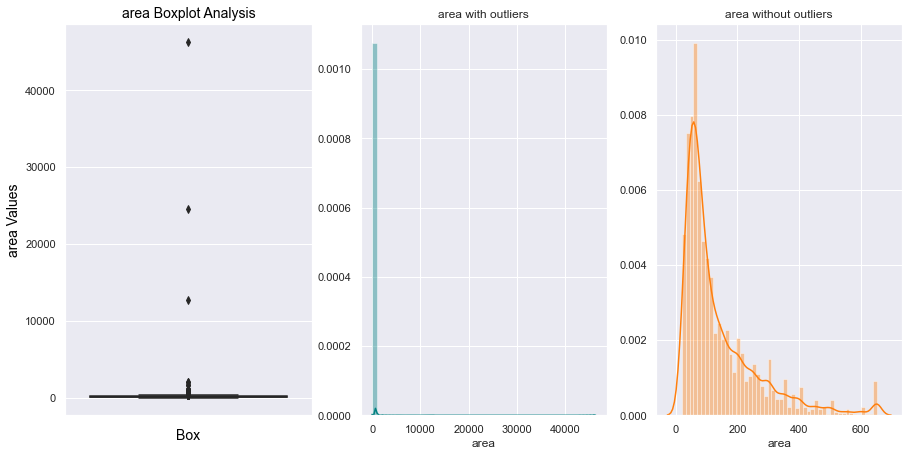

Hoa (r$) column --------------------------------------------------------------------------------
no of records with outliers values: 717


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
40,São Paulo,300,4,6,4,20,0,1,3700,12000,1584,153,17440
44,São Paulo,360,4,5,0,1,0,1,4000,6410,2000,82,12490
63,São Paulo,278,4,5,2,16,0,0,4052,9000,1261,115,14430
86,São Paulo,600,4,4,4,9,0,1,7400,8500,3368,108,19380
90,São Paulo,254,4,4,4,7,0,1,3366,9000,1800,115,14280


EDA for Hoa (r$) column --------------------------------------------------------------------------------


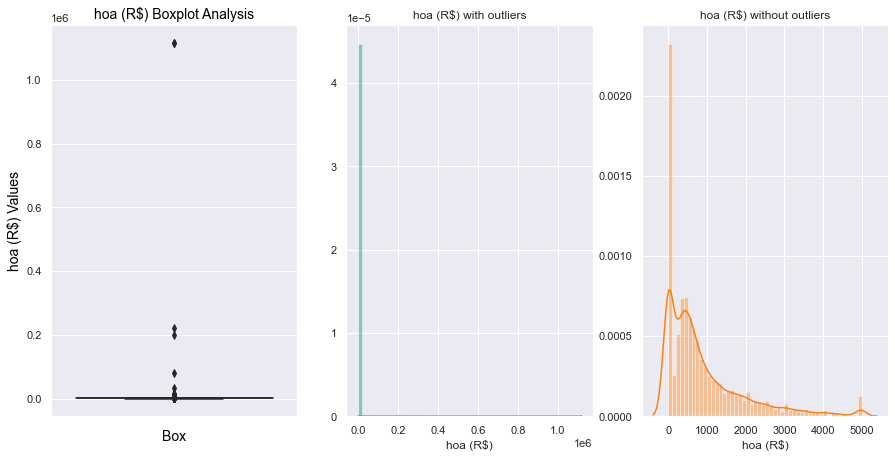

Rent amount (r$) column --------------------------------------------------------------------------------
no of records with outliers values: 715


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
8,São Paulo,152,2,2,1,3,0,0,1000,15000,250,191,16440
19,São Paulo,600,4,5,6,-,0,1,0,12000,9500,181,21680
37,Belo Horizonte,80,3,2,1,-,0,1,0,11000,425,181,11610
40,São Paulo,300,4,6,4,20,0,1,3700,12000,1584,153,17440
93,Belo Horizonte,296,4,3,2,-,0,1,0,13500,423,222,14150


EDA for Rent amount (r$) column --------------------------------------------------------------------------------


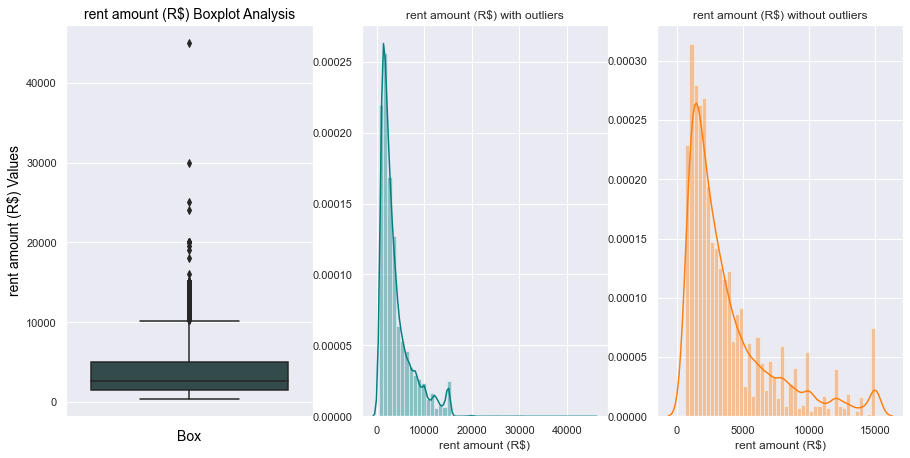

Property tax (r$) column --------------------------------------------------------------------------------
no of records with outliers values: 1081


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
1,São Paulo,320,4,4,0,20,0,1,1200,4960,1750,63,7973
7,São Paulo,213,4,4,4,4,0,1,2254,3223,1735,41,7253
19,São Paulo,600,4,5,6,-,0,1,0,12000,9500,181,21680
40,São Paulo,300,4,6,4,20,0,1,3700,12000,1584,153,17440
44,São Paulo,360,4,5,0,1,0,1,4000,6410,2000,82,12490


EDA for Property tax (r$) column --------------------------------------------------------------------------------


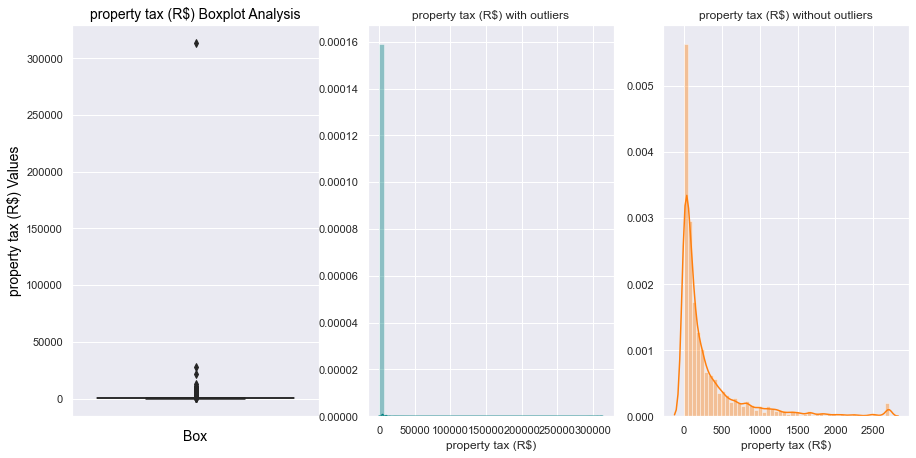

Fire insurance (r$) column --------------------------------------------------------------------------------
no of records with outliers values: 809


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
8,São Paulo,152,2,2,1,3,0,0,1000,15000,250,191,16440
19,São Paulo,600,4,5,6,-,0,1,0,12000,9500,181,21680
37,Belo Horizonte,80,3,2,1,-,0,1,0,11000,425,181,11610
40,São Paulo,300,4,6,4,20,0,1,3700,12000,1584,153,17440
91,Porto Alegre,350,4,4,4,-,0,0,1,9000,359,160,9520


EDA for Fire insurance (r$) column --------------------------------------------------------------------------------


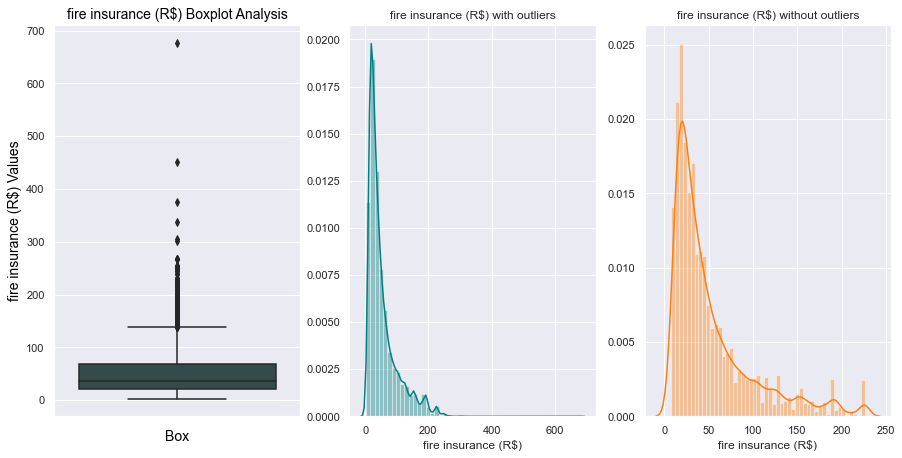

Total (r$) column --------------------------------------------------------------------------------
no of records with outliers values: 706


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
8,São Paulo,152,2,2,1,3,0,0,1000,15000,250,191,16440
19,São Paulo,600,4,5,6,-,0,1,0,12000,9500,181,21680
40,São Paulo,300,4,6,4,20,0,1,3700,12000,1584,153,17440
63,São Paulo,278,4,5,2,16,0,0,4052,9000,1261,115,14430
86,São Paulo,600,4,4,4,9,0,1,7400,8500,3368,108,19380


EDA for Total (r$) column --------------------------------------------------------------------------------


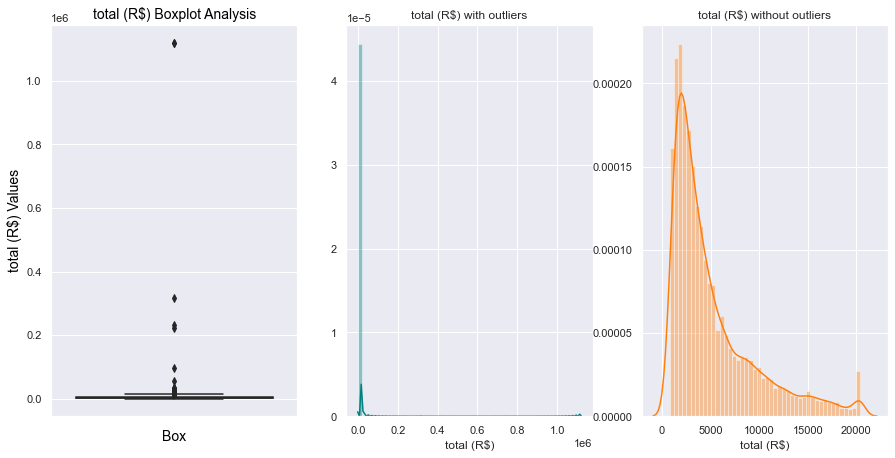

In [99]:
boxplotcolumns = ['area', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)',
                  'fire insurance (R$)','total (R$)']
for cols in boxplotcolumns:
    Q3 = data[cols].quantile(0.75)
    Q1 = data[cols].quantile(0.25)
    IQR = Q3 - Q1

    print(f'{cols.capitalize()} column', '--'*40)
    count = len(data.loc[(data[cols] < (Q1 - 1.5 * IQR)) | (data[cols] > (Q3 + 1.5 * IQR))])
    print(f'no of records with outliers values: {count}')
    
    display(data.loc[(data[cols] < (Q1 - 1.5 * IQR)) | (data[cols] > (Q3 + 1.5 * IQR))].head())
    print(f'EDA for {cols.capitalize()} column', '--'*40)
    odp_plots(data, cols)

del cols, IQR, boxplotcolumns

In [100]:
import plotly.express as px
city1 = data.loc[:,['city','rent amount (R$)']]
city1['data'] = city1.groupby('city')['rent amount (R$)'].transform('sum')
fig = px.pie(city1, names = 'city', values='data', template='seaborn')
fig.update_traces(rotation=90,pull=[0.2,0.03,0.1,0.03,0.1], showlegend=True)
fig.show()

In [101]:
area_df = data[data['area'] < 2000 ]
area_df = area_df[area_df['city']=="Rio de Janeiro"]
fig = px.scatter(area_df, x="rent amount (R$)", y="area", color="furniture",
           hover_name="furniture", log_x=True, size_max=30, marginal_y="violin",
           marginal_x="box", trendline="ols")
fig.show()

In [102]:
fig = px.scatter(area_df, x="rent amount (R$)", y="area", color="animal",
           hover_name="animal", log_x=True, size_max=40, marginal_y="violin",
           marginal_x="box", trendline="ols")
fig.show()

In [103]:
fig = px.scatter(area_df, x="rent amount (R$)", y="area", color="parking spaces",
           hover_name="parking spaces", size= "parking spaces", log_x=True, size_max=30)
fig.show()

In [104]:
fig = px.scatter(area_df, x="rent amount (R$)", y="area", color="bathroom",
           hover_name="bathroom", size= "bathroom", log_x=True, size_max=30)
fig.show()

In [105]:
fig = px.scatter(area_df, x="rent amount (R$)", y="area", color="rooms",
           hover_name='rooms', size= "rooms", log_x=True, size_max=30)
fig.show()

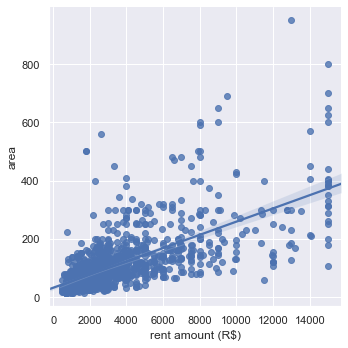

In [106]:
sns.lmplot(x="rent amount (R$)", y="area", data=area_df)

In [107]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,0,0,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,0,1,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,0,1,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,0,1,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,1,1,0,800,25,11,836


In [108]:
data.groupby('city')['total (R$)'].median().sort_values(ascending = False)

city
São Paulo         4596
Rio de Janeiro    3253
Belo Horizonte    3040
Porto Alegre      2211
Campinas          2140
Name: total (R$), dtype: int64

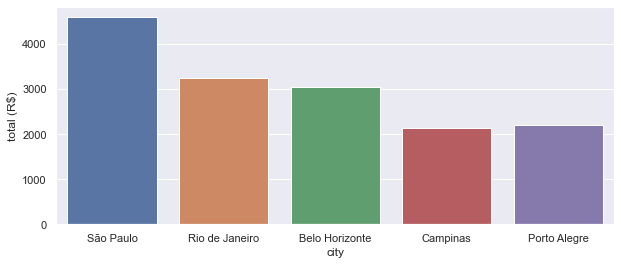

In [109]:
plt.figure(figsize=(10,4))
sns.barplot(x= data['city'], y= data['total (R$)'],ci= False,estimator= np.median,order=["São Paulo", "Rio de Janeiro","Belo Horizonte","Campinas","Porto Alegre"]);

# Correlation Matrix 

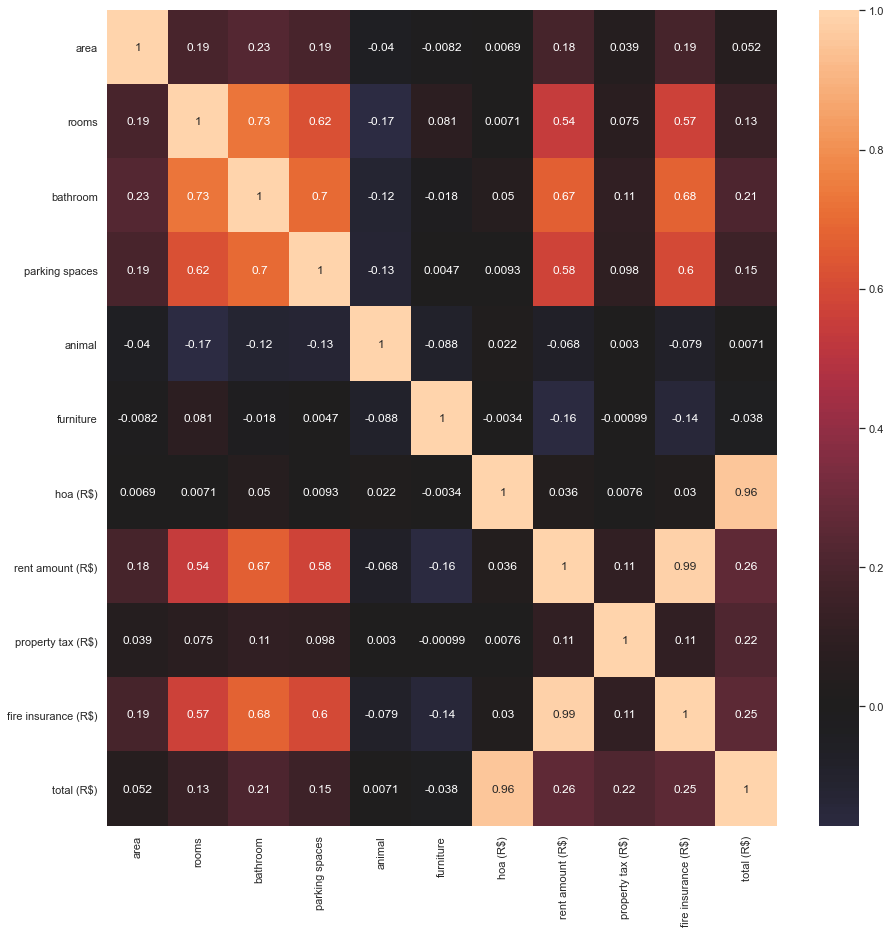

In [110]:
plt.figure(figsize=[15,15])
sns.set(font_scale=1)
sns.heatmap(data.corr(),center=0,annot=True)

In [111]:
data= data.select_dtypes(include=['int64', 'float64'])
absCorrwithDep = []
allVars = data.drop('rent amount (R$)', axis = 1).columns

for var in allVars:
    absCorrwithDep.append(abs(data['rent amount (R$)'].corr(data[var])))

display(pd.DataFrame([allVars, absCorrwithDep], index = ['Variable', 'Correlation']).T.\
        sort_values('Correlation', ascending = False))

,Variable,Correlation
8,fire insurance (R$),0.987343
2,bathroom,0.668504
3,parking spaces,0.578361
1,rooms,0.541758
9,total (R$),0.26449
0,area,0.180742
5,furniture,0.164235
7,property tax (R$),0.107884
4,animal,0.0677542
6,hoa (R$),0.0364897


In [112]:
data = data.drop('hoa (R$)', axis = 1)

In [113]:
data.head()

,area,rooms,bathroom,parking spaces,animal,furniture,rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,70,2,1,1,0,0,3300,211,42,5618
1,320,4,4,0,0,1,4960,1750,63,7973
2,80,1,1,1,0,1,2800,0,41,3841
3,51,2,1,0,0,1,1112,22,17,1421
4,25,1,1,0,1,1,800,25,11,836


# Data Splitting

In [114]:
from sklearn.model_selection import train_test_split
random_state = 44
np.random.seed(random_state)
target = data['rent amount (R$)']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.25, 
                                                    random_state = random_state, shuffle = False)

# Data Scaling 

In [115]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
y_train = y_train.values
y_test = y_test.values

display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8019, 10)

(8019,)

(2673, 10)

(2673,)

# Principle Component Analysis

In [116]:
cov_matrix = np.cov(X_train.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00012472  0.17907525  0.2162613   0.18353309 -0.03643132 -0.01130551
   0.16814293  0.032885    0.17440397  0.04253228]
 [ 0.17907525  1.00012472  0.73227032  0.62018409 -0.16652484  0.08544957
   0.53757535  0.06171782  0.56201291  0.11297995]
 [ 0.2162613   0.73227032  1.00012472  0.69916503 -0.11891698 -0.01537009
   0.66390188  0.09442457  0.67276626  0.18747568]
 [ 0.18353309  0.62018409  0.69916503  1.00012472 -0.12554934  0.00403141
   0.57914927  0.08445124  0.59896979  0.12700285]
 [-0.03643132 -0.16652484 -0.11891698 -0.12554934  1.00012472 -0.08609695
  -0.07054273  0.00874773 -0.08148742  0.01383618]
 [-0.01130551  0.08544957 -0.01537009  0.00403141 -0.08609695  1.00012472
  -0.16111828  0.00108659 -0.13832117 -0.03081263]
 [ 0.16814293  0.53757535  0.66390188  0.57914927 -0.07054273 -0.16111828
   1.00012472  0.09423127  0.98797701  0.23429466]
 [ 0.032885    0.06171782  0.09442457  0.08445124  0.00874773  0.00108659
   0.09423127  1.00012472  0.

In [117]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-1.45426022e-01 -8.35126342e-02 -2.61329433e-03  9.90629965e-03
  -9.52830721e-01  2.08979518e-01 -1.13766441e-01 -8.06332008e-02
  -2.77235790e-02 -1.15577093e-04]
 [-4.02322711e-01 -2.47113272e-01 -2.20780328e-02  6.83642368e-02
   2.56976043e-02 -1.39108520e-01  8.16472505e-02  3.82926826e-01
  -4.96792814e-01 -5.93124341e-01]
 [-4.46834126e-01 -9.84911622e-02  1.47363804e-02  7.86872782e-03
   6.15143055e-04 -1.04412641e-01  5.11637076e-02  2.74519539e-01
   8.26000436e-01 -1.38570833e-01]
 [-4.09546818e-01 -1.39862199e-01 -1.62044718e-02  3.96464261e-03
   1.55198144e-02 -1.08883337e-01  1.21328243e-01  3.27670434e-01
  -2.35788249e-01  7.89082167e-01]
 [ 8.47663740e-02  4.63028534e-01  3.30856117e-03 -2.28666273e-01
  -2.45797191e-01 -8.10040796e-01  6.44240110e-02  6.33064876e-02
  -2.81263921e-02 -2.42573291e-02]
 [ 3.73180000e-02 -5.14205146e-01 -1.22261015e-02  5.54282012e-01
  -1.02856885e-02 -4.90634087e-01 -1.70978164e-01 -3.89430426e-01
   4.15667563e-

In [118]:
tot = sum(eig_vals)
var_exp = [(i /tot) * 100 for i in sorted(eig_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

print('Cumulative Variance Explained', cum_var_exp)

Cumulative Variance Explained [ 38.32180681  50.6022678   61.69474681  71.13455229  80.09791566
  87.91948897  93.77175431  97.54553068  99.88638252 100.        ]


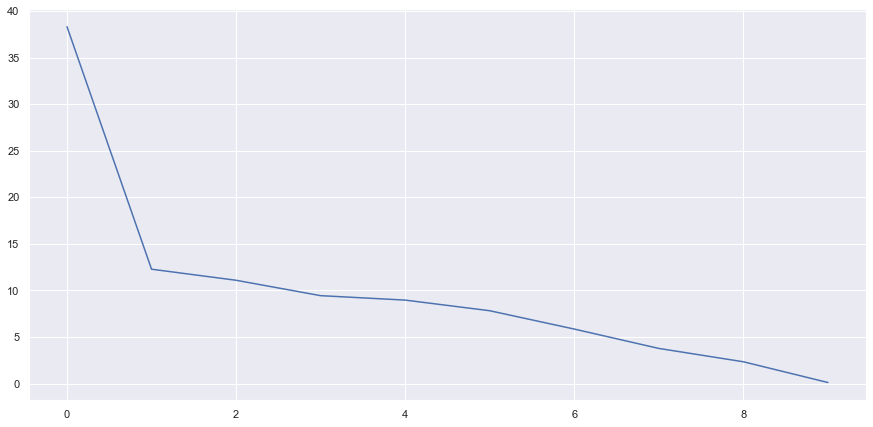

In [119]:
plt.figure(figsize = (15 , 7.2))
plt.plot(var_exp)

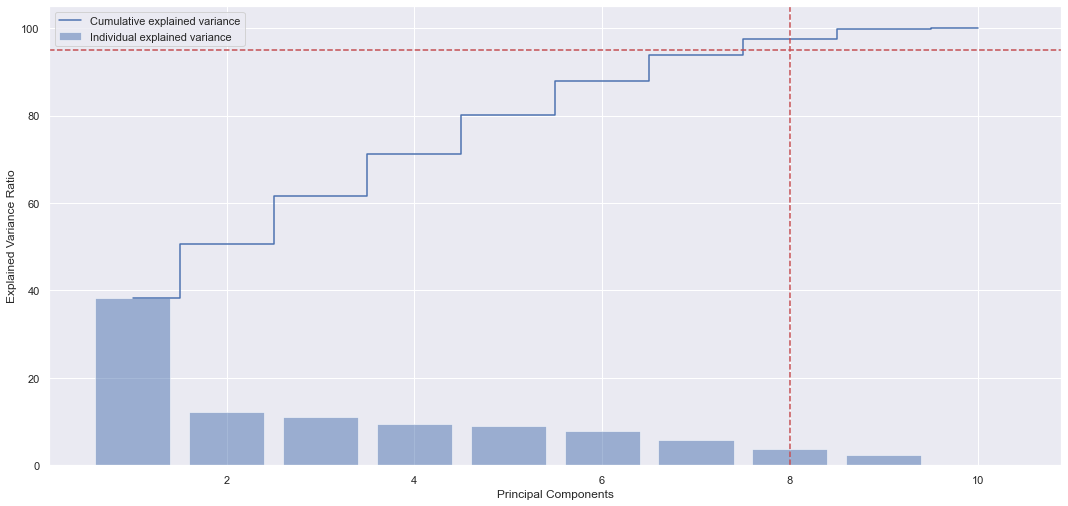

In [120]:
plt.figure(figsize = (15 , 7.2))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where = 'mid', label = 'Cumulative explained variance')
plt.axhline(y = 95, color = 'r', linestyle = '--')
plt.axvline(x = 8, color = 'r', linestyle = '--')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [121]:
from sklearn.decomposition import PCA
# Reducing the dimensions from 10 to 8
pca = PCA(n_components = 8, random_state = random_state)
pca.fit(X_train)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.fit_transform(X_test)
display(X_train_reduced.shape, X_test_reduced.shape)

(8019, 8)

(2673, 8)

In [122]:
df_train = pd.DataFrame(X_train_reduced).join(pd.DataFrame(y_train, columns = ['rent amount (R$)']), how = 'left', sort = False)
df_test = pd.DataFrame(X_test_reduced).join(pd.DataFrame(y_test, columns = ['rent amount (R$)']), how = 'left', sort = False)
df_train.shape, df_test.shape

((8019, 9), (2673, 9))

In [123]:
df_train

,0,1,2,3,4,5,6,7,rent amount (R$)
0,-0.822896,0.839629,-0.854246,-0.217322,1.443197,0.139886,0.328061,0.000962,3300
1,0.996793,-0.564942,0.744702,0.091524,0.067991,0.019849,-0.027863,-1.695170,4960
2,-1.342145,-0.241291,0.325274,-0.135363,0.408533,-0.293121,-0.839279,0.643431,2800
3,-1.734232,-0.561345,0.486236,-0.080621,0.328734,-0.159484,-0.273135,-0.334369,1112
4,-2.390010,0.729931,-0.105744,0.520833,-1.532057,-0.036285,-0.345113,0.114807,800
5,3.097130,-0.686712,0.229016,-0.103902,-0.201315,0.151178,-0.073710,2.342243,8000
6,-1.537840,-0.465393,0.464908,-0.092473,0.348024,-0.218299,-0.451084,-0.343713,1900
7,1.559906,-1.063803,0.888173,-0.014529,-0.258992,0.409693,1.264116,0.318239,3223
8,2.553069,1.987918,-1.631781,-0.807646,1.519788,-0.504867,-2.467471,-0.253752,15000
9,-1.700793,0.976634,-0.921517,-0.178184,1.595610,0.091104,0.032558,0.019293,2300


In [124]:
y = df_train['rent amount (R$)']
x = df_train.drop(['rent amount (R$)'],axis =1)

In [125]:
y.describe()

count     8019.000000
mean      3899.598952
std       3437.110533
min        460.000000
25%       1530.000000
50%       2680.000000
75%       5000.000000
max      45000.000000
Name: rent amount (R$), dtype: float64

In [126]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(x,y,test_size =0.3)

In [127]:
acc=[]

# Model Selection

# Decision Tree Regressor

In [128]:
from sklearn.tree import DecisionTreeRegressor as regr
model =regr()
model.fit(X_train,y_train)
from sklearn.metrics import r2_score
print(r2_score(y_test,model.predict(X_test)))
acc.append(['DTR',r2_score(y_test,model.predict(X_test))])

0.959403856676138


# Random Forest Regressor

In [129]:
from sklearn.ensemble import RandomForestRegressor as regr
model =regr()
model.fit(X_train,y_train)
print(r2_score(y_test,model.predict(X_test)))
acc.append(['RFN',r2_score(y_test,model.predict(X_test))])

0.9735165683631748


# Linear Regression

In [130]:
from sklearn.linear_model import LinearRegression as regr
model =regr()
model.fit(X_train,y_train)
print(r2_score(y_test,model.predict(X_test)))
acc.append(['LIR',r2_score(y_test,model.predict(X_test))])

-0.34017049523440157


# Support Vector Machine Regressor

In [131]:
from sklearn.svm import SVR as regr
model =regr()
model.fit(X_train,y_train)
print(r2_score(y_test,model.predict(X_test)))
acc.append(['SVM',r2_score(y_test,model.predict(X_test))])

0.1030847235359218


# K-Neighbors Regressor

In [132]:
from sklearn.neighbors import KNeighborsRegressor as regr
model =regr()
model.fit(X_train,y_train)
print(r2_score(y_test,model.predict(X_test)))
acc.append(['KNNR',r2_score(y_test,model.predict(X_test))])

0.9693363986565364


# Lasso Regression

In [133]:
from sklearn.linear_model import Lasso as regr
model =regr()
model.fit(X_train,y_train)
print(r2_score(y_test,model.predict(X_test)))
acc.append(['LaR',r2_score(y_test,model.predict(X_test))])

0.006411088621958938


# Ridge Regression

In [134]:
from sklearn.linear_model import Ridge as regr
model =regr()
model.fit(X_train,y_train)
print(r2_score(y_test,model.predict(X_test)))
acc.append(['RiR',r2_score(y_test,model.predict(X_test))])

-0.2466569892334347


# Model Evaluation

# Accuracy(r2 score)

In [135]:
acc.sort(key = lambda y:y[1],reverse =True)

In [136]:
acc

[['RFN', 0.9735165683631748],
 ['KNNR', 0.9693363986565364],
 ['DTR', 0.959403856676138],
 ['SVM', 0.1030847235359218],
 ['LaR', 0.006411088621958938],
 ['RiR', -0.2466569892334347],
 ['LIR', -0.34017049523440157]]

# Result

In [137]:
from sklearn.ensemble import RandomForestRegressor as regr
model =regr()
model.fit(X_train,y_train)
print(r2_score(y_test,model.predict(X_test)))
acc.append(['RFN',r2_score(y_test,model.predict(X_test))])

0.9728206819349475


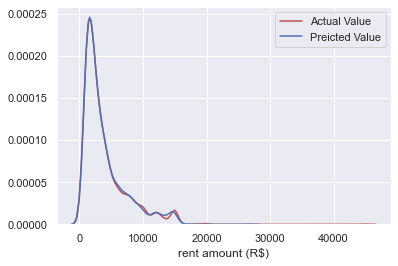

In [138]:
ax1 = sns.distplot(y_test,hist=False,kde =True,color ="r",label ="Actual Value")
sns.distplot(model.predict(X_test),color ="b",hist = False,kde =True, label = "Preicted Value",ax =ax1)